### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data
https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

---
**Context**
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc. He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies. Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem. In this problem you do not have to predict actual price but a price range indicating how high the price is.

##### Data Dictionary
    battery_power - Total energy a battery can store in one time measured in mAh
    blue - Has bluetooth or not
    clock_speed - speed at which microprocessor executes instructions
    dual_sim - Has dual sim support or not
    fc - Front Camera mega pixels
    four_g - Has 4G or not
    int_memory - Internal Memory in Gigabytes
    m_dep - Mobile Depth in cm
    mobile_wt - Weight of mobile phone
    n_cores - Number of cores of processor
    pc - Primary Camera mega pixels
    px_height - Pixel Resolution Height
    px_width - Pixel Resolution Width
    ram - Random Access Memory in Megabytes
    sc_h - Screen Height of mobile in cm
    sc_w - Screen Width of mobile in cm
    talk_time - longest time that a single battery charge will last when you are
    three_g - Has 3G or not
    touch_screen - Has touch screen or not
    wifi - Has wifi or not
    price_range - this is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

---

In [2]:
df = pd.read_csv("../../DATA/kaggle/mobile_price_calssification_train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df['price_range'].unique()

array([1, 2, 3, 0])

## Goal definition
**Predict a price range indicating how high the price is.**\
\
The problem refers to classification, that is, to predict the price range (0 - cheap, 1 - medium, 2 - expensive, 3 - premium).

## Exploratory Data Analysis and Visualisations

#### Basic Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.shape

(2000, 21)

#### Missing values

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### Duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

#### Statistical analysis

In [8]:
df.dtypes == 'object'

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [10]:
# Finding correlation
corr_matrix = df.corr()
corr_matrix

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [11]:
corr_matrix['price_range'].sort_values()

touch_screen    -0.030411
mobile_wt       -0.030302
clock_speed     -0.006606
m_dep            0.000853
n_cores          0.004399
four_g           0.014772
dual_sim         0.017444
wifi             0.018785
blue             0.020573
talk_time        0.021859
fc               0.021998
sc_h             0.022986
three_g          0.023611
pc               0.033599
sc_w             0.038711
int_memory       0.044435
px_height        0.148858
px_width         0.165818
battery_power    0.200723
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

##### Conclusions
The strongest correlation with price range have in order **ram** (almost 1! Very strong correlation. With higher ram value, the price range is higher), battery_power, px_width and px_height.

#### Visualisations

#### Price range value counts

<Axes: xlabel='price_range', ylabel='count'>

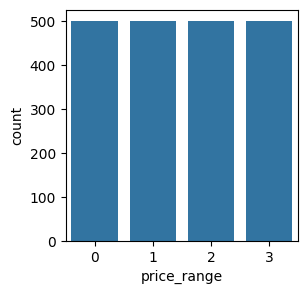

In [12]:
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='price_range')

In [13]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

##### Conclusions
Perfectly balanced data - this will achieve No model bias and reliable metrics.

#### Features correlation

<Axes: >

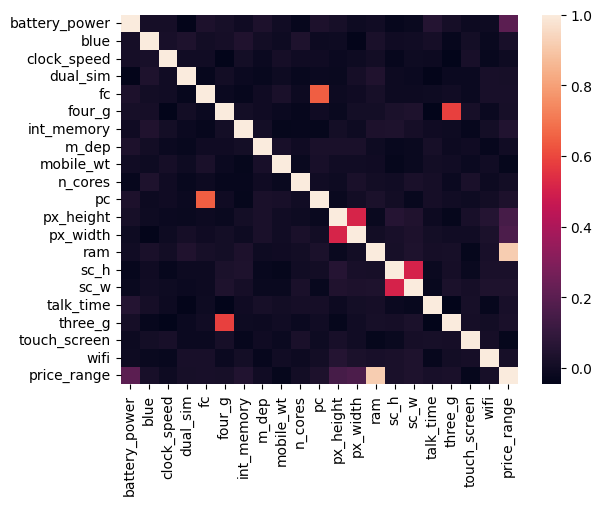

In [14]:
sns.heatmap(df.corr())

##### Conclusions
Above we see the beautifully illustrated conclusions of the statistical analysis - the highest correlation can be seen between frame and price range.

#### Relationship between price and ram

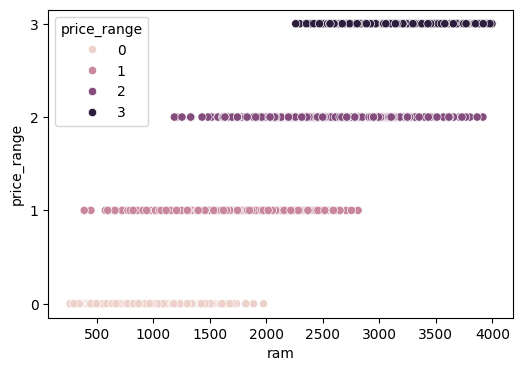

In [15]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='ram', y='price_range', hue='price_range')
plt.yticks(range(0, 4, 1))
plt.show()

##### Conclusions


#### RAM distribution and outliers

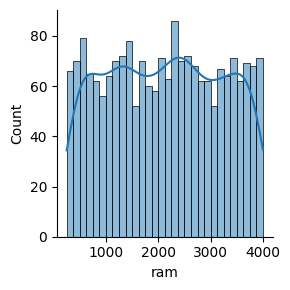

In [16]:
sns.displot(data=df, x='ram', bins=30, kde=True, height=3)

<Axes: xlabel='ram'>

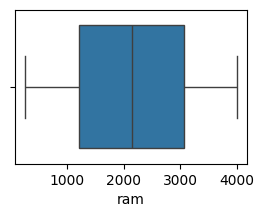

In [17]:
plt.figure(figsize=(3,2))
sns.boxplot(data=df, x='ram')

##### Conclusions
The RAM distribution is balanced and has no outliers, so it can be assumed that models will better learn the differences between classes.

#### Outliers for other fairly highly correlated features

<Axes: xlabel='px_height'>

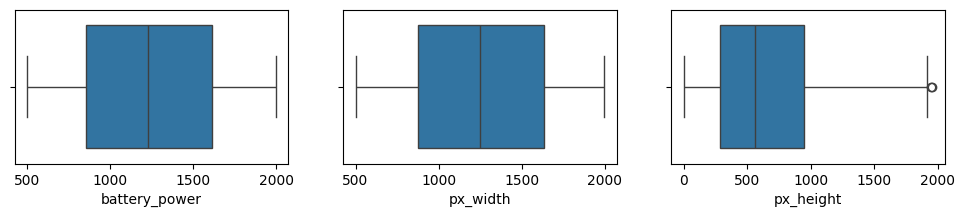

In [18]:
fig, axes = plt.subplots(1,3, figsize=(12,2))
sns.boxplot(data=df, x='battery_power', ax=axes[0])
sns.boxplot(data=df, x='px_width', ax=axes[1])
sns.boxplot(data=df, x='px_height', ax=axes[2])

##### Conclusions
No outliers found for battery_power and px_width. However, a single outlier for px_height was found and is located on the right (large value), which may suggest the presence of an unusually high screen resolution.

## Modeling

### Data preparation

In [19]:
evaluation_dict = {}

In [20]:
X = df.drop('price_range', axis=1)
y = df['price_range']

### Train | Test Split

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [23]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [25]:
logreg_model = LogisticRegression(max_iter=1000)

In [26]:
param_grid_l1 = {
    'penalty': ['l1'],
    'C': np.logspace(0,4,10),
    'solver': ['liblinear', 'saga']
}

In [27]:
param_grid_l2 = {
    'penalty': ['l2'],
    'C': np.logspace(0,4,10),
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'saga']
}

In [28]:
param_grid_elasticnet = {
    'penalty': ['elasticnet'],
    'C': np.logspace(0,4,10),
    'solver': ['saga'],
    'l1_ratio': [0,0.25,0.5,0.75,1]
}

In [29]:
logreg_l1_grid_model = GridSearchCV(logreg_model, param_grid_l1, cv=5)
logreg_l2_grid_model = GridSearchCV(logreg_model, param_grid_l2, cv=5)
logreg_elasticnet_grid_model = GridSearchCV(logreg_model, param_grid_elasticnet, cv=5)

In [30]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning, message=".*did not converge.*")

In [31]:
logreg_l1_grid_model.fit(scaled_X_train, y_train)
logreg_l2_grid_model.fit(scaled_X_train, y_train)
logreg_elasticnet_grid_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                         'penalty': ['elasticnet'], 'solver': ['saga']})

### Evaluation

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [33]:
def metrics(y_test, y_pred):
    accuracy =  accuracy_score(y_test, y_pred)
    print('Accuracy score = ', accuracy)
    print('\n\nClassification report:\n', classification_report(y_test, y_pred), '\n\n')
    return accuracy
    
def plot_conf_matrix(model_name, model, conf_matrix):
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
    
    fig, ax = plt.subplots(figsize=(3,3))
    fig.suptitle(f'{model_name}: Confusion Matrix')
    disp.plot(ax=ax)
    plt.show()    

def evaluate(grid_models):
    final_model = None
    best_accuracy = 0.0

    for penalty_type, model in grid_models.items():
        model_name = 'Logistic Regression ' + penalty_type
        print('\t\t\033[1m' + model_name + '\033[0m') # bold title

        # Predict
        y_pred = model.predict(scaled_X_test)

        # Show metrics and get accuracy score to compare
        accuracy = metrics(y_test, y_pred)

        # Show confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plot_conf_matrix(model_name, model, conf_matrix)
        print('\n-----')

        # Compare accuracy of models
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            final_model = model
            
    evaluation_dict['LogisticRegression'] =  {"Accuracy": best_accuracy}
    return final_model

		Logistic Regression L1
Accuracy score =  0.96


Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.94      0.96      0.95        75
           2       0.98      0.91      0.94        93
           3       0.94      1.00      0.97        65

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300
 




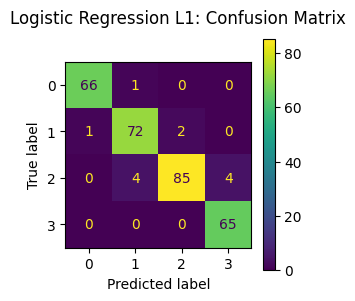


-----
		Logistic Regression L2
Accuracy score =  0.9633333333333334


Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.92      0.97      0.95        75
           2       0.99      0.91      0.95        93
           3       0.96      1.00      0.98        65

    accuracy                           0.96       300
   macro avg       0.96      0.97      0.97       300
weighted avg       0.96      0.96      0.96       300
 




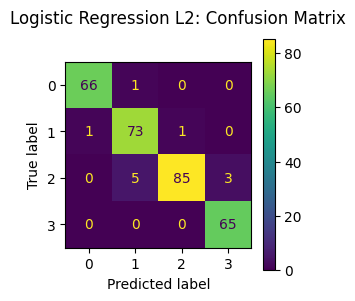


-----
		Logistic Regression ElasticNet
Accuracy score =  0.96


Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.94      0.96      0.95        75
           2       0.98      0.91      0.94        93
           3       0.94      1.00      0.97        65

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300
 




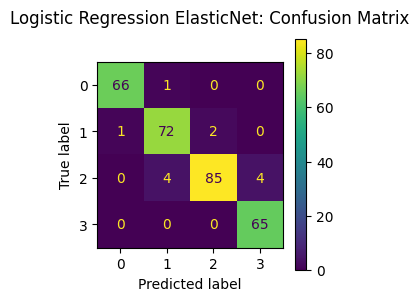


-----


In [34]:
grid_models = {
    'L1': logreg_l1_grid_model,
    'L2': logreg_l2_grid_model,
    'ElasticNet': logreg_elasticnet_grid_model
}

logreg_final_model = evaluate(grid_models)

In [35]:
logreg_final_model.best_params_

{'C': np.float64(166.81005372000593), 'penalty': 'l2', 'solver': 'lbfgs'}

#### Overfitting check

In [36]:
train_acc = accuracy_score(y_train, logreg_final_model.predict(scaled_X_train))
test_acc = accuracy_score(y_test, logreg_final_model.predict(scaled_X_test))

print(f'Train Accuracy: {train_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

Train Accuracy: 0.9918
Test Accuracy: 0.9633


## SVM

### Model

In [37]:
from sklearn.svm import SVC

In [38]:
svc_model = SVC()

In [39]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2,3,4],
}

In [40]:
svc_grid_model = GridSearchCV(svc_model, param_grid, cv=5)

In [41]:
svc_grid_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [42]:
svc_grid_model.best_params_

{'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

### Evaluation

In [43]:
y_pred = svc_grid_model.predict(scaled_X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9566666666666667

In [45]:
print('Classification report:\n', classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.91      0.96      0.94        75
           2       0.99      0.90      0.94        93
           3       0.96      1.00      0.98        65

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



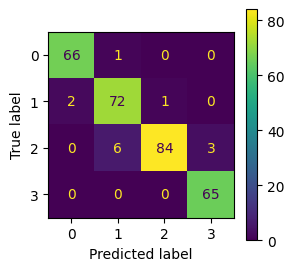

In [46]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=svc_grid_model.classes_)
    
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax)
plt.show()    

In [47]:
evaluation_dict['SVM'] =  {"Accuracy": accuracy}

#### Overfitting check

In [48]:
train_acc = accuracy_score(y_train, svc_grid_model.predict(scaled_X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f'Train Accuracy: {train_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

Train Accuracy: 0.9900
Test Accuracy: 0.9567


## Random Forest

### Model

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf_model = RandomForestClassifier(bootstrap=True, oob_score=True)

In [51]:
param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 15],
    'max_features': ['sqrt', 'log2', 10],
    'criterion': ['gini', 'entropy']
}

In [52]:
rf_grid_model = GridSearchCV(rf_model, param_grid, cv=5)

In [53]:
rf_grid_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(oob_score=True),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15],
                         'max_features': ['sqrt', 'log2', 10],
                         'n_estimators': [200, 300, 500]})

In [54]:
rf_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 10,
 'n_estimators': 200}

### Evaluation

In [55]:
y_pred = rf_grid_model.predict(scaled_X_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.88

In [57]:
print('Classification report:\n', classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92        67
           1       0.80      0.85      0.83        75
           2       0.90      0.81      0.85        93
           3       0.89      0.98      0.93        65

    accuracy                           0.88       300
   macro avg       0.88      0.89      0.88       300
weighted avg       0.88      0.88      0.88       300



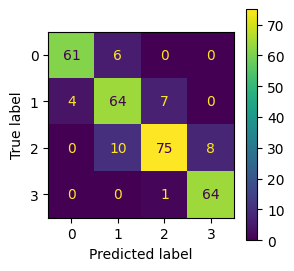

In [58]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=rf_grid_model.classes_)
    
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax)
plt.show()    

In [59]:
evaluation_dict['RandomForest'] =  {"Accuracy": accuracy}

#### Overfitting check

In [60]:
train_acc = accuracy_score(y_train, rf_grid_model.predict(scaled_X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f'Train Accuracy: {train_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

Train Accuracy: 1.0000
Test Accuracy: 0.8800


## XGBoost

### Model

In [61]:
from xgboost import XGBClassifier

In [62]:
xgb_model = XGBClassifier()

In [63]:
param_grid = {
    'n_estimators': [100,200],  
    'max_depth': [4,5,6],  
    'learning_rate': [0.04,0.05,0.06]
}

In [64]:
xgb_grid_model = GridSearchCV(xgb_model, param_grid, cv=5)

In [65]:
xgb_grid_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.04, 0.05, 0.06],
                         'max_depth': [4, 5, 6], 'n_estimators': [100, 200]})

In [66]:
xgb_grid_model.best_params_

{'learning_rate': 0.06, 'max_depth': 4, 'n_estimators': 200}

### Evaluation

In [67]:
y_pred = xgb_grid_model.predict(scaled_X_test)

In [68]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.91

In [69]:
print('Classification report:\n', classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        67
           1       0.85      0.91      0.88        75
           2       0.93      0.85      0.89        93
           3       0.90      0.98      0.94        65

    accuracy                           0.91       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.91      0.91      0.91       300



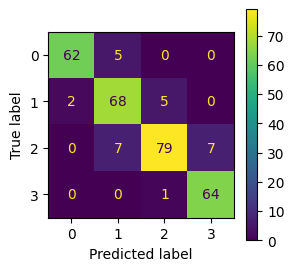

In [70]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=xgb_grid_model.classes_)
    
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax)
plt.show()    

In [71]:
evaluation_dict['XGBoost'] =  {"Accuracy": accuracy}

#### Overfitting check

In [72]:
train_acc = accuracy_score(y_train, xgb_grid_model.predict(scaled_X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f'Train Accuracy: {train_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

Train Accuracy: 1.0000
Test Accuracy: 0.9100


## Models comparison

In [73]:
df_evaluation = pd.DataFrame(evaluation_dict).T.sort_values(by="Accuracy", ascending=False)
df_evaluation

,Accuracy
LogisticRegression,0.963333
SVM,0.956667
XGBoost,0.910000
RandomForest,0.880000


#### Conclusions

Logistic Regression and SVM achieve higher accuracy than XGBoost and Random Forest, so this means that the data can be linearly separable.

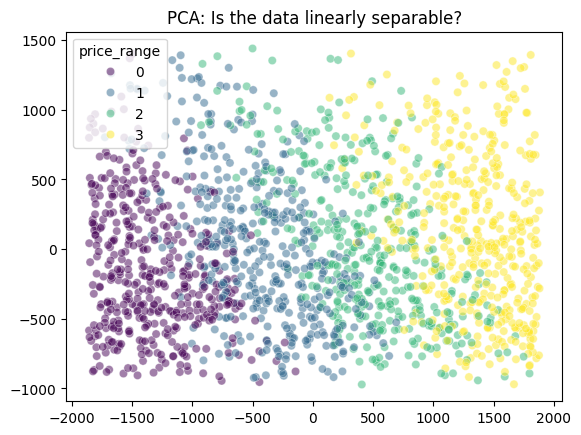

In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='viridis', alpha=0.5)
plt.title("PCA: Is the data linearly separable?")
plt.show()

The graph above shows a clear gradient from purple points on the left to yellow points on the right. There is not much overlap between the different classes, which means that a linear model, such as Logistic Regression or SVM with linear kernel, work very well. In this case, XGBoost and Random Forest are too complicated models and do not give a significant improvement (overfitting and perform worse on the test set).

## Final Model

In [75]:
import joblib

In [76]:
joblib.dump(logreg_final_model, '../Models_joblib/Classification_mobile_price_FINAL.joblib')

['../Models_joblib/Classification_mobile_price_FINAL.joblib']

Accuracy:  0.9633333333333334


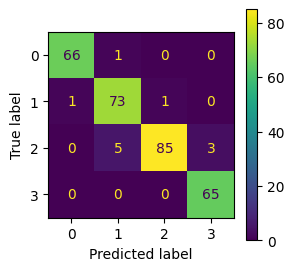

In [77]:
model_loaded = joblib.load('../Models_joblib/Classification_mobile_price_FINAL.joblib')
prediction = model_loaded.predict(scaled_X_test)

print("Accuracy: ", accuracy_score(y_test, prediction))

conf_matrix = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=model_loaded.classes_)
    
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax)
plt.show()    